## Observations and Insights

- There is almost the same amount of female and male mice
- The weight seems to be correlated with the tumor size
- Not all mice show the same improvement given the same Drug Regimen
- Rammicane, Capomulin, Propriva and Ceftamin seem to be the most effective treatments.

## Dependencies and starter code

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(study_results, mouse_metadata , on="Mouse ID", how="left")
merge_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

average = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({"Mean":average, "Median":median, "Variance":variance, 
                         "Standard Deviation":standard_dev, "SEM":sem})


summary_statistics.sort_values(["Mean"], ascending=True)






,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

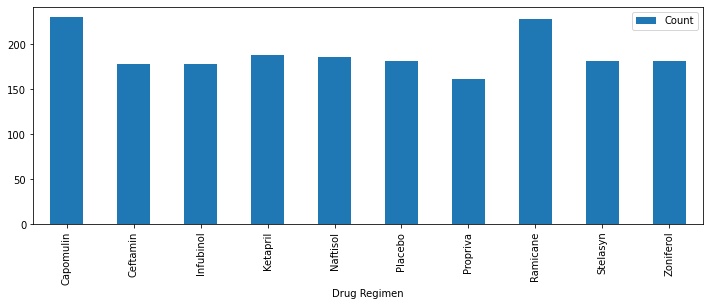

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

summary = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()

summary_columns = summary[["Drug Regimen", "Mouse ID"]]
summary_columns = summary_columns.rename(columns={"Mouse ID":"Count"})
summary_columns = summary_columns.set_index("Drug Regimen")
summary_columns.plot(kind="bar", figsize=(12,4))  
plt.show()
                     
                     
                     

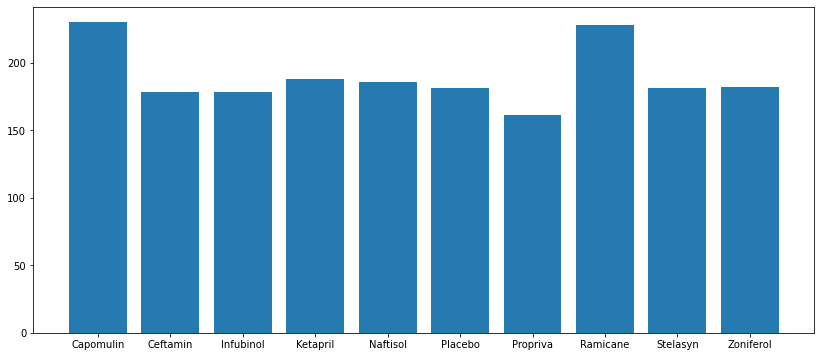

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


treatments = summary_statistics.index.tolist()
count_treatment = (merge_table.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = treatments
plt.figure(figsize=(14,6))
plt.bar(x_axis, count_treatment, color="#267ab2", align="center")
plt.show()



## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


mice_gender = merge_table["Sex"].value_counts()
mice_gender = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
mice_gender = mice_gender[["Sex","Mouse ID"]]
mice_gender = mice_gender.rename(columns={"Sex":"Sex", "Mouse ID":"Count"})
mice_gender

,Sex,Count
0,Female,935
1,Male,958


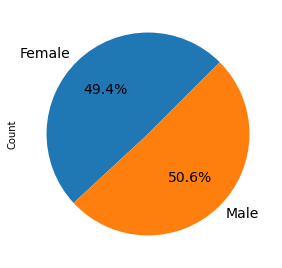

In [6]:
plt.figure(figsize=(10,6))
axes = plt.subplot(122, aspect="equal")
mice_gender.plot(kind="pie", y = "Count", ax=axes, autopct="%1.1f%%", startangle=45, shadow=False, labels=mice_gender["Sex"], legend = False, fontsize=14)
plt.show()

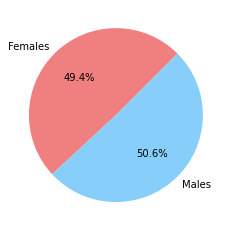

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (merge_table.groupby(["Sex"])["Mouse ID"].count()).tolist()
gender_count

labels = ["Females", "Males"]

sizes = [49.3, 50.6]

colors = ["lightcoral", "lightskyblue"]

explode = (0, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=45)

plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

sorted_treatments = merge_table.sort_values(["Drug Regimen", "Mouse ID"], ascending=True)
capomulin = sorted_treatments[sorted_treatments['Drug Regimen'].isin(['Capomulin'])]
capomulin_tumors = capomulin.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_tumors = capomulin_tumors["Tumor Volume (mm3)"]


quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.685932865
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 7.314067135000002
The the median of tumor volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [9]:
sorted_treatments = merge_table.sort_values(["Drug Regimen", "Mouse ID"], ascending=True)
ramicane = sorted_treatments[sorted_treatments['Drug Regimen'].isin(['Ramicane'])]
ramicane_tumors = ramicane.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_tumors = ramicane_tumors["Tumor Volume (mm3)"]


quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 36.67463458499999
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 8.325365415000007
The the median of tumor volume is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [10]:
sorted_treatments = merge_table.sort_values(["Drug Regimen", "Mouse ID"], ascending=True)
propriva = sorted_treatments[sorted_treatments['Drug Regimen'].isin(['Propriva'])]
propriva_tumors = propriva.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
propriva_tumors = propriva_tumors["Tumor Volume (mm3)"]


quartiles =propriva_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 47.0810859
The upper quartile of tumor volume is: 56.18466399
The interquartile range of tumor volume is: 9.10357809
The the median of tumor volume is: 50.8546323 
Values below 33.425718765 could be outliers.
Values above 69.840031125 could be outliers.


In [11]:
sorted_treatments = merge_table.sort_values(["Drug Regimen", "Mouse ID"], ascending=True)
ceftamin = sorted_treatments[sorted_treatments['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_tumors = ceftamin.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_tumors = ceftamin_tumors["Tumor Volume (mm3)"]


quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 47.208427112500004
The upper quartile of tumor volume is: 56.801437570000004
The interquartile range of tumor volume is: 9.5930104575
The the median of tumor volume is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


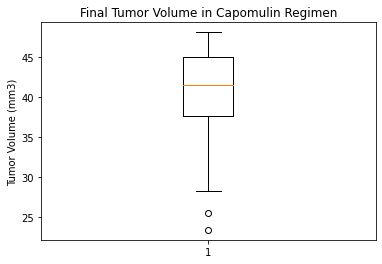

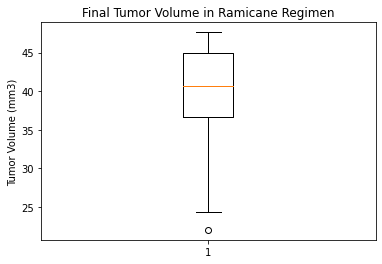

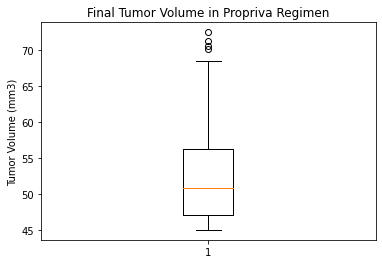

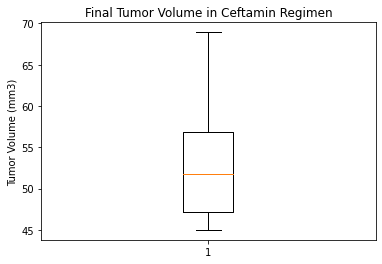

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_tumors)
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume in Ramicane Regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane_tumors)
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume in Propriva Regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(propriva_tumors)
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume in Ceftamin Regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ceftamin_tumors)
plt.show()



## Line and scatter plots

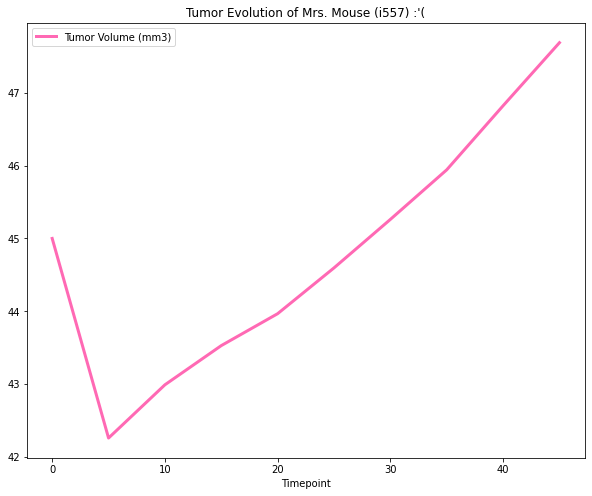

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_mrs_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]

capomulin_mrs_mouse = capomulin_mrs_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mrs_mouse.set_index('Timepoint').plot(figsize=(10, 8), linewidth=3, color="hotpink").set_title("Tumor Evolution of Mrs. Mouse (i557) :'(")
plt.show()


In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_columns = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)", "Drug Regimen"]]
average_volume = pd.DataFrame(scatter_columns.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean())
average_volume.head()

,,Tumor Volume (mm3)
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


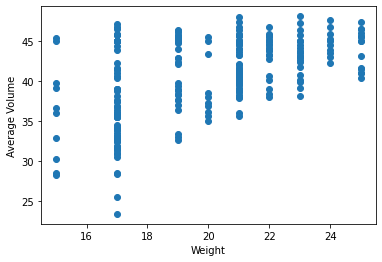

In [15]:
x_values = scatter_columns["Weight (g)"]
y_values = scatter_columns["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight")
plt.ylabel("Average Volume")

plt.show()

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

weight = scatter_columns.iloc[:,1]
tumor_volume = scatter_columns.iloc[:,2]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation coeficient between both factors is {round(correlation[0],2)}")

The correlation coeficient between both factors is 0.53


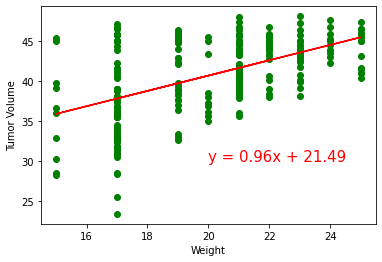

In [17]:
weight = scatter_columns.iloc[:,1]
tumor_volume = scatter_columns.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_volume, color="green")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()
